### Change of Dataset from Checkpoint 1 to Checkpoint 2

We received feedback on checkpoint 1 being that the amount of entries of 100 might not be enough, so we decided to completely change our dataset to a dataset about anime because it has around 14K entries.  

https://www.kaggle.com/datasets/arnavvvvv/anime-dataset

### Data Processing:

Before we can actually analyze the data, we first must clean and process it into a format that will allows us to easily access the data points. We dropped of the empty or incomplete entries and removed potential duplicates. All of the data columns were string types when the csv file was initally read, so we had to convert them into the appropiate type. 

We first changed the type of the 'members' and 'popularity' columns into integers. We then converted the string in the 'genre' column back into string arrays, so we can analyze it later. 

Finally, we realized that the format for 'aired' column was inconsistent due to it originally being a string that comprises of two dates. However, this leads to the problem where some animes only aired for a single day and some of the dates were missing either the day or month. In order to remedy this, we are only going to check when the anime first aired. We also will use regex to check every date and if it is missing, we will be adding in missing numbers by adding '1' for missing day and 'January' for missing month. We then converted all of the columns into datetime type so we can compare and filter it later.  

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import re
df = pd.read_csv("animes.csv")
df = df.drop_duplicates()
df = df.dropna()
df['members'] = df['members'].astype(int)
df['popularity'] = df['popularity'].astype(int)
df['genre'] = df['genre'].apply(eval)
df = df.drop('img_url', axis=1)
df = df.drop('link', axis=1)
df['aired'] = df['aired'].str.split(' to ').str[0]

def parse_date(date_str):
    formats = [r'^\w+ \d+\, \d{4}$', r'^\w+ \d{4}$', r'^\d{4}$']
    for fmt in formats:
      x = re.search(fmt, date_str)
      if (x):
        x = str(x.group())
        if fmt == r'^\w+ \d{4}$':
          x = x.replace(" ", " 1, ")
        elif fmt == r'^\d{4}$':
          x = "January 1, "+ x
      return pd.to_datetime(x)
    return pd.NaT
df['aired'] = df['aired'].apply(parse_date)
df = df.dropna()
display(df)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]",2015-10-04,25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]",2014-10-10,22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",2017-07-07,13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...",2009-04-05,64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]",2017-01-06,1.0,214621,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...,...
19002,10075,Naruto x UT,All-new animation offered throughout UNIQLO cl...,"[Action, Comedy, Super Power, Martial Arts, Sh...",2011-01-01,1.0,34155,2382,1728.0,7.50
19003,35828,Miira no Kaikata,High school student Sora Kashiwagi is accustom...,"[Slice of Life, Comedy, Supernatural]",2018-01-12,12.0,61459,1648,1727.0,7.50
19004,10378,Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...","[Slice of Life, Comedy, Shounen]",2011-09-27,12.0,67422,1547,1548.0,7.56
19005,33082,Kingsglaive: Final Fantasy XV,"For years, the Niflheim Empire and the kingdom...",[Action],2016-07-09,1.0,41077,2154,1544.0,7.56


### Basic Data Exploration and Summary Statistics:

1. 
- Z-Test Hypothesis:
- HA: The mean score of Anime with "Action" genre will be greater or equal to 7  
- H0: The mean score of Anime with "Action" genre will be less than 7

Conclusion: because the graph is skewed, we can use the median as an indicator, and the median of every Action anime's score is 6.88 which is below 7. We also look at the p-value and since it is above 0.05, we fail to reject the null hypothesis. 

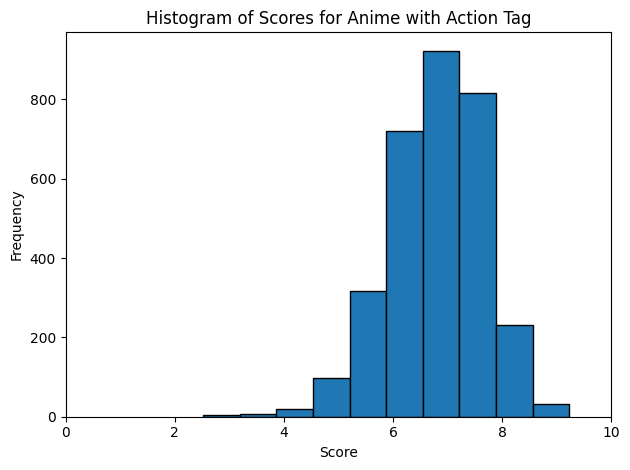

Median score of Action entries: 6.84
Estimated p-value (One-tailed test): 0.4055449187072703
The result is not statistically significant (fail to reject null hypothesis).


In [44]:
action_entries = df[df['genre'].apply(lambda x: 'Action' in x)]
mean = action_entries['score'].mean()
std_dev = action_entries['score'].std()
plt.hist(action_entries['score'], bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for Anime with Action Tag')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()
median_score = action_entries['score'].median()
print("Median score of Action entries:", median_score)
score_value = 7
z_score = (score_value - mean) / std_dev
p_value = 1 - scipy.stats.norm.cdf(z_score)
print("Estimated p-value (One-tailed test):", p_value)
if p_value < 0.05:
    print("The result is statistically significant (reject null hypothesis).")
else:
    print("The result is not statistically significant (fail to reject null hypothesis).")


2. There are 96 lower outliers when it comes to score of anime and one higher outlier, suggesting that anime is generally well received as when there are outliers or bad anime, it is a noticable exception. 

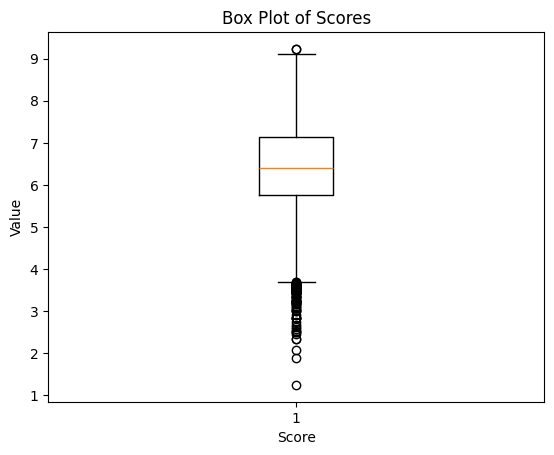

Number of lower outliers: 96


In [80]:
score_data = df['score'].dropna()
plt.boxplot(score_data)
plt.xlabel('Score')
plt.ylabel('Rating')
plt.title('Box Plot of Scores')
plt.show()
q1 = score_data.quantile(0.25)
q3 = score_data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
lower_outliers = df[df['score'] < lower_bound].shape[0]
print(f"Number of lower outliers: {lower_outliers}")

3. The most common genre amongst the top 100 ranked animes is 'Drama' with 50 entries, followed by 'Action' tied for second with 46, and 'Comedy' and 'Shounen' being tied for third. 

{'Action': 46, 'Military': 10, 'Adventure': 26, 'Comedy': 44, 'Drama': 50, 'Magic': 2, 'Fantasy': 20, 'Shounen': 44, 'Thriller': 6, 'Sci-Fi': 34, 'Super Power': 10, 'Romance': 14, 'Supernatural': 28, 'School': 16, 'Mystery': 20, 'Historical': 30, 'Parody': 18, 'Samurai': 18, 'Space': 4, 'Game': 2, 'Seinen': 14, 'Slice of Life': 20, 'Sports': 8, 'Mecha': 6, 'Vampire': 6, 'Demons': 6, 'Music': 2, 'Josei': 2, 'Martial Arts': 2, 'Horror': 4, 'Police': 2, 'Psychological': 4, 'Shoujo': 4}


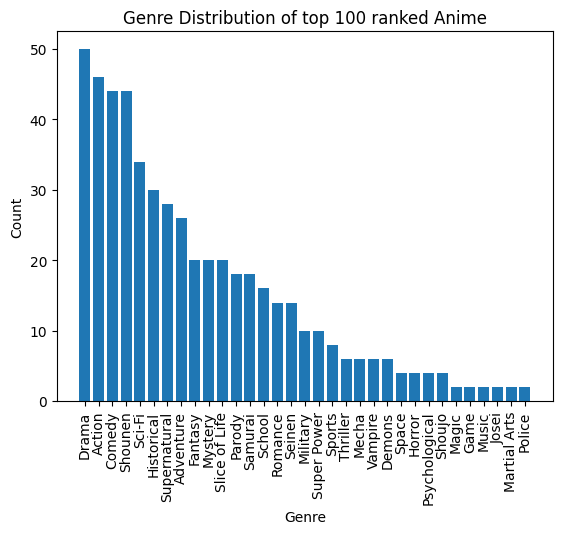

In [85]:
lowest_ranked = df.nsmallest(100, 'ranked')
def g(df):
   #df['genre'] = df['genre'].apply(eval)
   return df
df2 = g(lowest_ranked)
genre_counts = {}
def f(df):
  for genres in df['genre']:
    for genre in genres:
      if genre in genre_counts:
        genre_counts[genre] += 1
      else:
        genre_counts[genre] = 1
  return genre_counts
genre_counts = f(df2)
print(genre_counts)

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
genre_names, genre_counts = zip(*sorted_genres)

# Create a bar chart
plt.bar(genre_names, genre_counts)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution of top 100 ranked Anime")
plt.xticks(rotation=90) 

plt.show()

### Conclusion:

The bulk of what we were looking for involves the 'score' value for an anime. The anime data combines numerics, text, and genre lists, requiring various analysis techniques. The skewed score distribution with outliers suggests non-parametric tests and outlier handling. Genres call for techniques that handle categorical variables for exploring relationships with other features